In [14]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [15]:
integer=torch.tensor(1)
dec=torch.tensor(3.4445)
print(f"Integer is {integer.ndim} dim tensor.")
print(f"dec is {dec.ndim} dim tensor.")
a=torch.tensor([1,3,4,5])
print(f"a is {a.ndim} dim tensor")
c=torch.tensor([range(100)])
print(f"c is {c.ndim} dim tensor with shape {c.shape}")


Integer is 0 dim tensor.
dec is 0 dim tensor.
a is 1 dim tensor
c is 2 dim tensor with shape torch.Size([1, 100])


In [16]:

matrix = torch.tensor([[1,2],[4,5]])
assert isinstance(matrix, torch.Tensor), "matrix must be a torch Tensor object"
assert matrix.ndim == 2
images = torch.zeros((10,3,256,256))
assert isinstance(images, torch.Tensor), "images must be a torch Tensor object"
assert images.ndim == 4, "images must have 4 dimensions"
assert images.shape == (10, 3, 256, 256), "images is incorrect shape"
print(f"images is a {images.ndim}-d Tensor with shape: {images.shape}")

images is a 4-d Tensor with shape: torch.Size([10, 3, 256, 256])


In [17]:
row_vector=matrix[0]
column_vector=matrix[:,1]
scalar=matrix[0,1]

print(f"row vector is {row_vector}")
print(f"column vector is {column_vector}")
print(f"scalar is {scalar}")

row vector is tensor([1, 2])
column vector is tensor([2, 5])
scalar is 2


In [18]:
#computation in pytorch

a=torch.tensor(6)
b=torch.tensor(18)

c1=torch.add(a,b)
c2=a+b

print(f"c1 is of {c1.ndim} dim , shape {c1.shape} and with value {c1}")
print(f"c2 is of {c2.ndim} dim , shape {c2.shape} and with value {c2}")

c1 is of 0 dim , shape torch.Size([]) and with value 24
c2 is of 0 dim , shape torch.Size([]) and with value 24


In [19]:
def func(a,b):
    c=torch.add(a,b)
    d=torch.sub(b,1)
    e=torch.mul(c,d)
    return e

In [20]:

a, b = 1.5, 2.5

e_out = func(a, b)
print(f"e_out: {e_out}")

e_out: 6.0


In [21]:
class newDenseLayer(torch.nn.Module):
    def __init__(self, input_dim,output_dim):
        super(newDenseLayer, self).__init__()
        self.W=torch.nn.Parameter(torch.randn(input_dim,output_dim))
        self.bias=torch.nn.Parameter(torch.randn(output_dim))
        
    def forward(self,x):
        z=torch.matmul(x,self.W)
        y=torch.sigmoid(z)
        return y

In [22]:
num_inputs = 2
num_outputs = 3
layer = newDenseLayer(num_inputs, num_outputs)
x_input = torch.tensor([[1, 2.]])
y = layer(x_input)
print(f"input shape: {x_input.shape}")
print(f"output shape: {y.shape}")
print(f"output result: {y}")

input shape: torch.Size([1, 2])
output shape: torch.Size([1, 3])
output result: tensor([[0.7498, 0.8062, 0.2270]], grad_fn=<SigmoidBackward0>)


In [25]:
n_input_node=2
n_output_node=2
model=nn.Sequential(
    nn.Linear(n_input_node,n_output_node)
)

In [27]:
# Test the model with example input
x_input = torch.tensor([[1, 2.]])
model_output = model(x_input)
print(f"input shape: {x_input.shape}")
print(f"output shape: {model_output.shape}")
print(f"output result: {y}")

input shape: torch.Size([1, 2])
output shape: torch.Size([1, 2])
output result: tensor([[0.7498, 0.8062, 0.2270]], grad_fn=<SigmoidBackward0>)


In [30]:
class LinearWithSigmoidActivation(nn.Module):
    def __init__(self,num_inputs,num_outputs):
        super(LinearWithSigmoidActivation,self).__init__()
        
        self.linear=nn.Linear(num_inputs,num_outputs)
        self.activation=nn.Sigmoid()
        
    def forward(self,input):
        linear_output=self.linear(input)
        output=self.activation(linear_output)
        return output

In [31]:
n_input_nodes = 2
n_output_nodes = 3
model = LinearWithSigmoidActivation(n_input_nodes, n_output_nodes)
x_input = torch.tensor([[1, 2.]])
y = model(x_input)
print(f"input shape: {x_input.shape}")
print(f"output shape: {y.shape}")
print(f"output result: {y}")

input shape: torch.Size([1, 2])
output shape: torch.Size([1, 3])
output result: tensor([[0.4949, 0.7320, 0.4100]], grad_fn=<SigmoidBackward0>)


In [32]:
class LinearButSometimeIdentity(nn.Module):
    def __init__(self,n_input,n_output):
        super(LinearButSometimeIdentity,self).__init__()
        self.linear=nn.Linear(n_input,n_output)
        
    def forward(self,input,isIdentity=False):
        if isIdentity:
            output=input
        else:
            output=self.linear(input)
        return output

In [35]:
# Test the IdentityModel
model = LinearButSometimeIdentity(n_input=2, n_output=3)
x_input = torch.tensor([[1, 2.]])

'''TODO: pass the input into the model and call with and without the input identity option.'''
out_with_linear = model(x_input,isIdentity=False)

out_with_identity = model(x_input,isIdentity=True)

print(f"input: {x_input}")
print("Network linear output: {}; network identity output: {}".format(out_with_linear, out_with_identity))

input: tensor([[1., 2.]])
Network linear output: tensor([[-1.0509,  1.8704, -0.2845]], grad_fn=<AddmmBackward0>); network identity output: tensor([[1., 2.]])


In [36]:
x=torch.tensor(3.0,requires_grad=True)
y=x**2
y.backward()
dy_dx=x.grad

print("dy_dx of y=x^2 at x=3.0 is: ", dy_dx)
assert dy_dx == 6.0

dy_dx of y=x^2 at x=3.0 is:  tensor(6.)


Initializing x=-0.4335525333881378


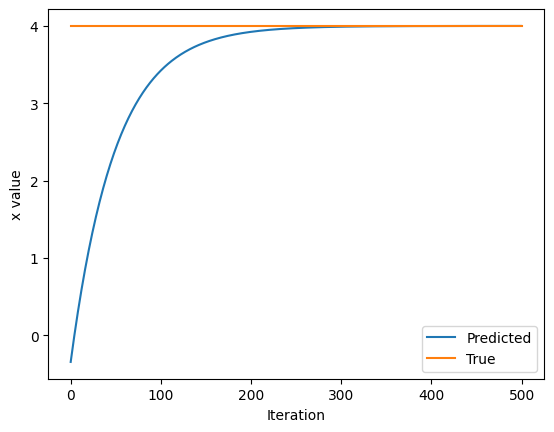

In [38]:

x = torch.randn(1)
print(f"Initializing x={x.item()}")

learning_rate = 1e-2  # Learning rate
history = []
x_f = 4 


for i in range(500):
    x = torch.tensor([x], requires_grad=True)

    # TODO: Compute the loss as the square of the difference between x and x_f
    loss = (x-x_f)**2

    # Backpropagate through the loss to compute gradients
    loss.backward()

    # Update x with gradient descent
    x = x.item() - learning_rate * x.grad

    history.append(x.item())

# Plot the evolution of x as we optimize toward x_f!
plt.plot(history)
plt.plot([0, 500], [x_f, x_f])
plt.legend(('Predicted', 'True'))
plt.xlabel('Iteration')
plt.ylabel('x value')
plt.show()